Критерия Пирсона для normal распределения: χ² = 3.0516
Критическое значение χ² для уровня значимости α = 0.05 и 3 степеней свободы: 7.8147
Нулевая гипотеза normal принимается


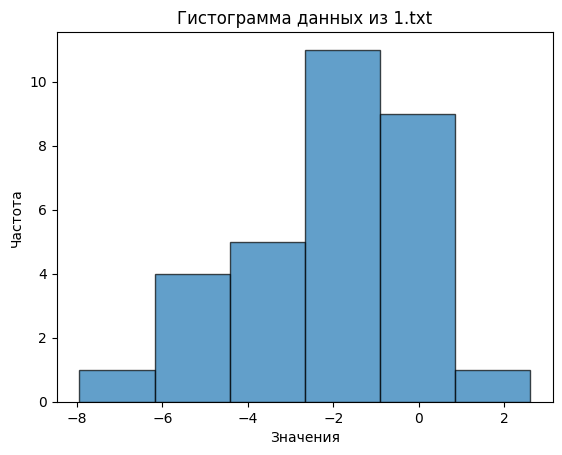

Критерия Пирсона для normal распределения: χ² = 10.5788
Критическое значение χ² для уровня значимости α = 0.05 и 5 степеней свободы: 11.0705
Нулевая гипотеза normal принимается


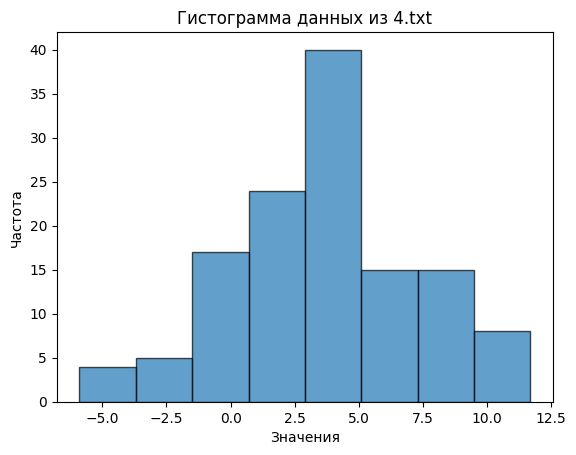

Критерия Пирсона для exponential распределения: χ² = 12.4702
Критическое значение χ² для уровня значимости α = 0.05 и 4 степеней свободы: 9.4877
Нулевая гипотеза exponential отвергается


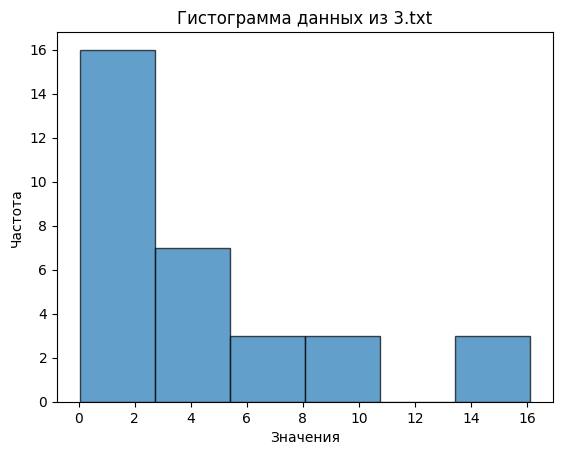

Критерия Пирсона для exponential распределения: χ² = 4.6721
Критическое значение χ² для уровня значимости α = 0.05 и 6 степеней свободы: 12.5916
Нулевая гипотеза exponential принимается


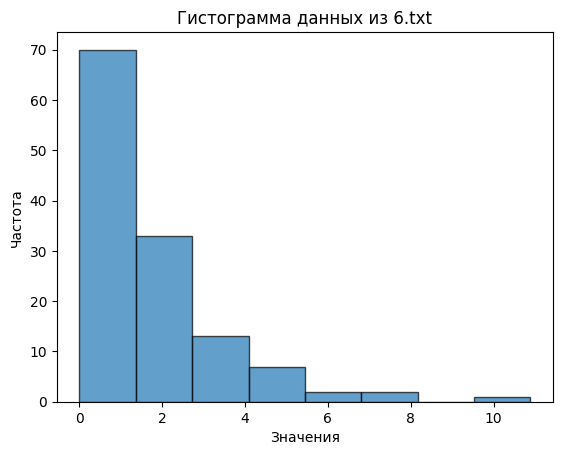

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, chi2, expon

def load_data(file_name):
    with open(file_name, 'r') as file:
        return [float(line.strip()) for line in file.readlines()]

def calculate_intervals_and_frequencies(data, num_intervals=None):
    if num_intervals is None:
        num_intervals = int(1 + 3.322 * np.log10(len(data)))

    min_val, max_val = min(data), max(data)
    interval_width = (max_val - min_val) / num_intervals
    intervals = [min_val + i * interval_width for i in range(num_intervals + 1)]
    hist, _ = np.histogram(data, bins=intervals)
    relative_freq = hist / len(data)

    return intervals, hist, relative_freq

def calculate_theoretical_frequencies(data, intervals, distribution='normal'):
    n = len(data)
    mu, sigma = np.mean(data), np.std(data, ddof=1)
    theoretical_freq = []

    for i in range(len(intervals) - 1):
        if distribution == 'normal':
            p_i = norm.cdf(intervals[i + 1], loc=mu, scale=sigma) - norm.cdf(intervals[i], loc=mu, scale=sigma)
        elif distribution == 'exponential':
            lambd = 1 / np.mean(data)
            p_i = expon.cdf(intervals[i + 1], scale=1/lambd) - expon.cdf(intervals[i], scale=1/lambd)

        theoretical_freq.append(n * p_i)

    return theoretical_freq

def chi_square_test(observed, expected):
    return sum((o - e) ** 2 / e for o, e in zip(observed, expected) if e > 0)

def perform_chi_square_test(data, distribution='normal'):
    intervals, absolute_freq, _ = calculate_intervals_and_frequencies(data)
    theoretical_freq = calculate_theoretical_frequencies(data, intervals, distribution)
    chi_square_value = chi_square_test(absolute_freq, theoretical_freq)

    alpha = 0.05
    df = len(absolute_freq) - 1 - (2 if distribution == 'normal' else 1)
    chi_square_critical = chi2.ppf(1 - alpha, df)

    print(f"Критерия Пирсона для {distribution} распределения: χ² = {chi_square_value:.4f}")
    print(f"Критическое значение χ² для уровня значимости α = {alpha} и {df} степеней свободы: {chi_square_critical:.4f}")

    if chi_square_value > chi_square_critical:
        print(f"Нулевая гипотеза {distribution} отвергается")
    else:
        print(f"Нулевая гипотеза {distribution} принимается")

files = ['1.txt', '4.txt', '3.txt', '6.txt']
distributions = ['normal', 'normal', 'exponential', 'exponential']

for file, distribution in zip(files, distributions):
    data = load_data(file)
    perform_chi_square_test(data, distribution)

    intervals = calculate_intervals_and_frequencies(data)[0]
    plt.hist(data, bins=intervals, edgecolor='black', alpha=0.7)
    plt.title(f'Гистограмма данных из {file}')
    plt.xlabel('Значения')
    plt.ylabel('Частота')
    plt.show()


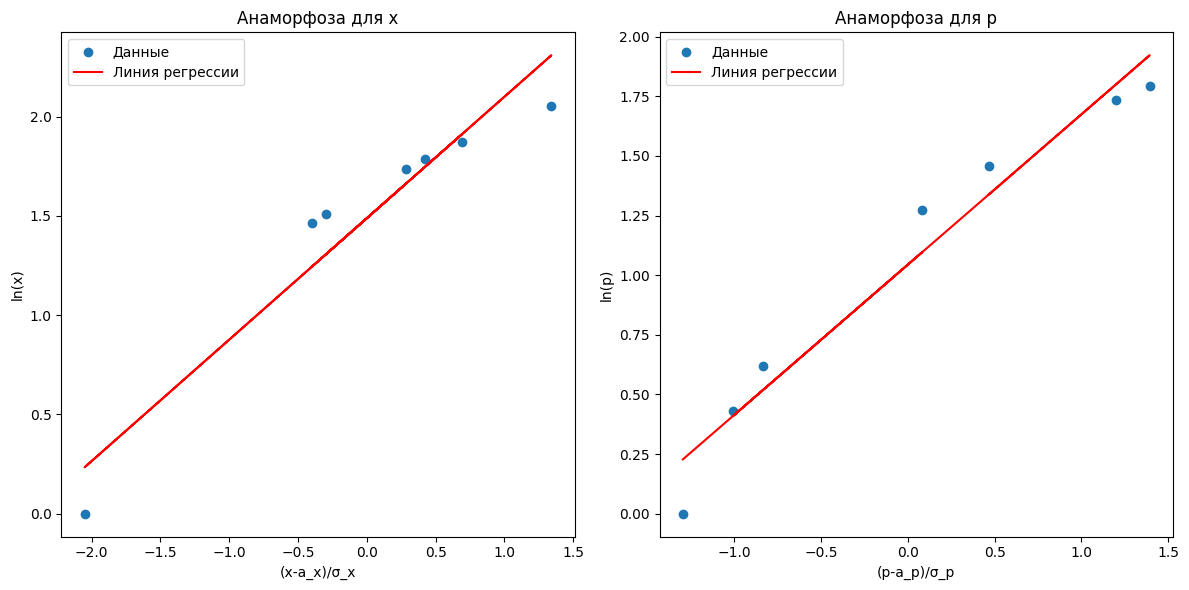

Коэффициент детерминации для x: 0.9239420735192199
Коэффициент детерминации для p: 0.9556221743925477
Распределение x нормальное
Распределение p нормальное


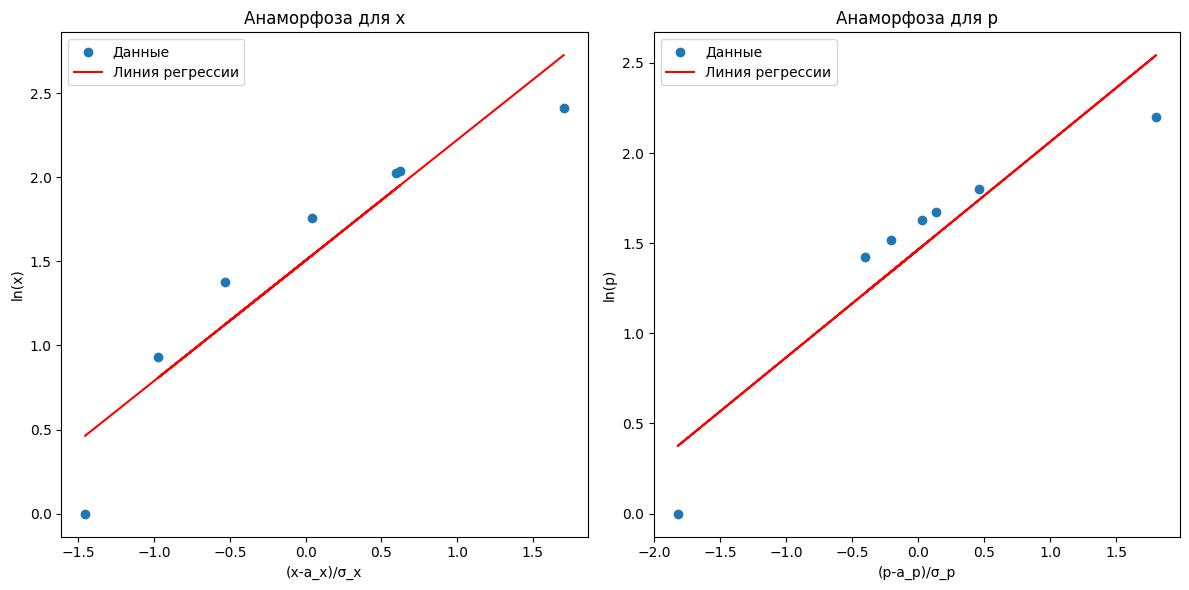

Коэффициент детерминации для x: 0.8867191890011876
Коэффициент детерминации для p: 0.8707507816344836
Распределение x нормальное
Распределение p нормальное


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import random

def load_data(file_name):
    with open(file_name, 'r') as file:
        return [float(line.strip()) for line in file.readlines()]

file_names = ['1.txt', '4.txt']

for file in file_names:
    data = load_data(file)

    x = data
    p = data

    random_indices_x = random.sample(range(len(x)), 7)
    random_indices_p = random.sample(range(len(p)), 7)

    x_sample = [x[i] for i in random_indices_x]
    p_sample = [p[i] for i in random_indices_p]

    min_x = min(x_sample)
    if min_x <= 0:
        x_sample = [xi - min_x + 1 for xi in x_sample]

    min_p = min(p_sample)
    if min_p <= 0:
        p_sample = [pi - min_p + 1 for pi in p_sample]

    def anamorphosis(sample):
        a = np.mean(sample)
        sigma = np.std(sample)
        ln_sample = np.log(sample)
        transformed = (sample - a) / sigma
        return transformed, ln_sample

    x_transformed, ln_x = anamorphosis(x_sample)
    p_transformed, ln_p = anamorphosis(p_sample)

    slope_x, intercept_x, r_value_x, _, _ = linregress(x_transformed, ln_x)
    slope_p, intercept_p, r_value_p, _, _ = linregress(p_transformed, ln_p)

    regression_line_x = slope_x * x_transformed + intercept_x
    regression_line_p = slope_p * p_transformed + intercept_p

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.scatter(x_transformed, ln_x, label='Данные')
    plt.plot(x_transformed, regression_line_x, color='red', label='Линия регрессии')
    plt.title('Анаморфоза для x')
    plt.xlabel('(x-a_x)/σ_x')
    plt.ylabel('ln(x)')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.scatter(p_transformed, ln_p, label='Данные')
    plt.plot(p_transformed, regression_line_p, color='red', label='Линия регрессии')
    plt.title('Анаморфоза для p')
    plt.xlabel('(p-a_p)/σ_p')
    plt.ylabel('ln(p)')
    plt.legend()

    plt.tight_layout()
    plt.show()

    print(f'Коэффициент детерминации для x: {r_value_x**2}')
    print(f'Коэффициент детерминации для p: {r_value_p**2}')

    if r_value_x**2 > 0.8:
        print("Распределение x нормальное")
    else:
        print("Распределение x не нормальное")

    if r_value_p**2 > 0.8:
        print("Распределение p нормальное")
    else:
        print("Распределение p не нормальное")


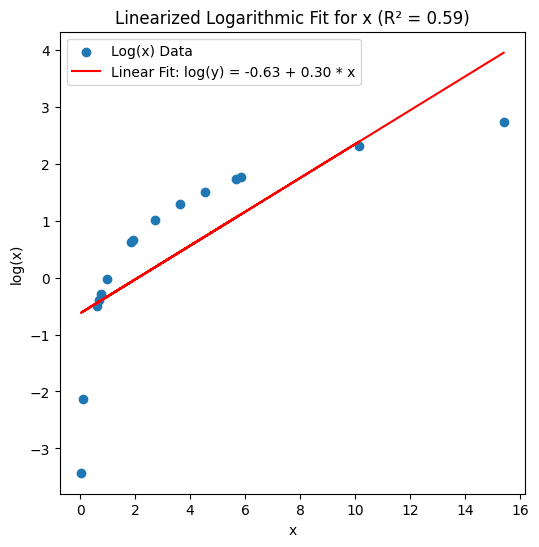

Коэффициенты экспоненциальной регрессии для x: a = 0.53, b = 0.30
Коэффициент детерминации R² для x: 0.59
Распределение x экспоненциальное


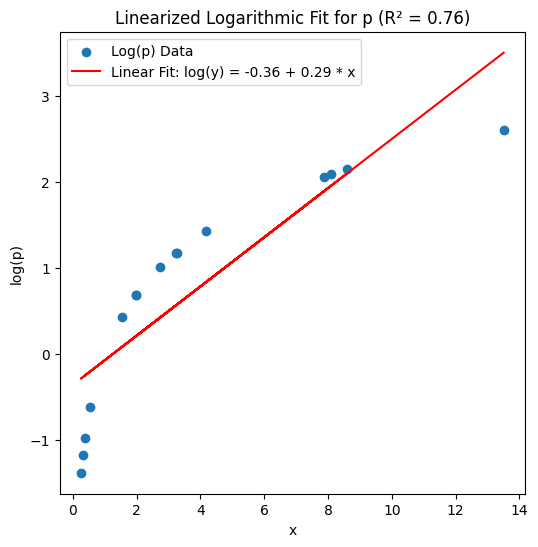

Коэффициенты экспоненциальной регрессии для p: a = 0.70, b = 0.29
Коэффициент детерминации R² для p: 0.76
Распределение p экспоненциальное


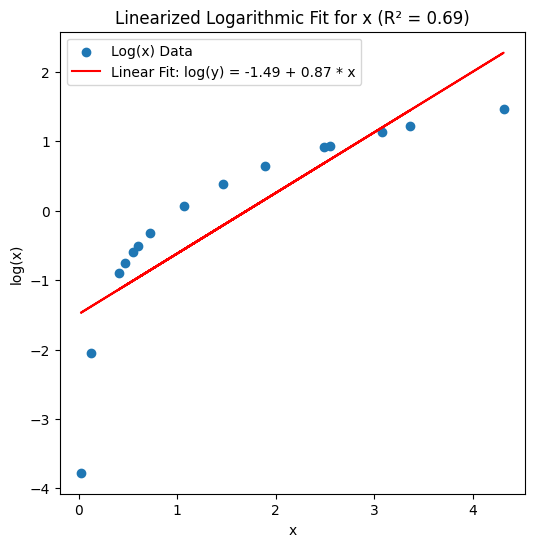

Коэффициенты экспоненциальной регрессии для x: a = 0.23, b = 0.87
Коэффициент детерминации R² для x: 0.69
Распределение x экспоненциальное


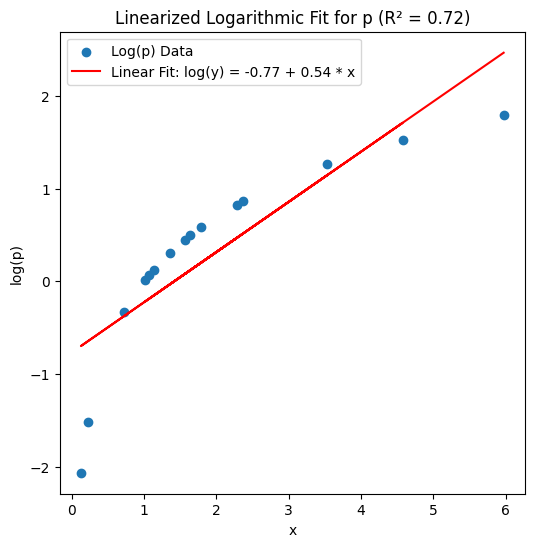

Коэффициенты экспоненциальной регрессии для p: a = 0.47, b = 0.54
Коэффициент детерминации R² для p: 0.72
Распределение p экспоненциальное


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import random

def load_data(file_name):
    with open(file_name, 'r') as file:
        return [float(line.strip()) for line in file.readlines()]

def exponential_regression(x_sample, label):
    log_y_sample = np.log(x_sample)

    slope, intercept, r_value, _, _ = linregress(x_sample, log_y_sample)

    a = np.exp(intercept)
    b = slope

    r_squared = r_value**2

    plt.figure(figsize=(6, 6))
    plt.scatter(x_sample, log_y_sample, label=f'Log({label}) Data')
    plt.plot(x_sample, intercept + slope * np.array(x_sample), color='red',
             label=f'Linear Fit: log(y) = {intercept:.2f} + {slope:.2f} * x')

    plt.xlabel('x')
    plt.ylabel(f'log({label})')
    plt.title(f'Linearized Logarithmic Fit for {label} (R² = {r_squared:.2f})')
    plt.legend()
    plt.show()

    print(f"Коэффициенты экспоненциальной регрессии для {label}: a = {a:.2f}, b = {b:.2f}")
    print(f"Коэффициент детерминации R² для {label}: {r_squared:.2f}")
    if r_squared > 0.8:
        print(f"Распределение {label} нормальное")
    else:
        print(f"Распределение {label} экспоненциальное")

file_names = ['3.txt', '6.txt']
for file_name in file_names:
    data = load_data(file_name)

    mid_index = len(data) // 2
    x_data = data[:mid_index]
    p_data = data[mid_index:]

    random_indices_x = random.sample(range(len(x_data)), 15)
    random_indices_p = random.sample(range(len(p_data)), 15)

    x_sample = [x_data[i] for i in random_indices_x]
    p_sample = [p_data[i] for i in random_indices_p]

    exponential_regression(x_sample, 'x')
    exponential_regression(p_sample, 'p')
